# Roches Point Weather
***


This is a Roches Point Weather data analysis to determine the potential for wind power generation and assessing trends and future projections.

### Library

In [570]:
#Import required libraries

import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt  # for data visualisation and graphical plotting
import seaborn as sns  # built on top of matplotlib with similar functionalities
import numpy as np # for mathematical operations on arrays.
import datetime as dt # for date and time manipulation

from datetime import timedelta # date and time manipulation
from sklearn.linear_model import LinearRegression # for relationship analysis between two variables.
from sklearn.model_selection import train_test_split # for model training and testing
from sklearn.ensemble import RandomForestRegressor # for predicting numerical values
from sklearn.metrics import mean_squared_error, r2_score # for evaluation of regression models performance



### Load Data

In [571]:
# Load data and skip the first 17 rows.
df = pd.read_csv(r"C:\Users\phumi\OneDrive\Documents\hly1075\Roches Point Weather.csv", skiprows=17, low_memory=False)

# Display the first few rows
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir
0,01-dec-1955 01:00,0,0.0,0,10.7,0,10.0,9.4,11.8,91,1002.1,1,16,1,170
1,01-dec-1955 02:00,0,2.9,0,9.8,0,9.7,10.0,12.0,99,1001.8,1,11,1,190
2,01-dec-1955 03:00,0,3.8,0,9.7,0,9.5,9.4,11.7,97,1001.7,1,9,1,160


### Examine the structure

In [572]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584831 entries, 0 to 584830
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    584831 non-null  object
 1   ind     584831 non-null  int64 
 2   rain    584831 non-null  object
 3   ind.1   584831 non-null  int64 
 4   temp    584831 non-null  object
 5   ind.2   584831 non-null  int64 
 6   wetb    584831 non-null  object
 7   dewpt   584831 non-null  object
 8   vappr   584831 non-null  object
 9   rhum    584831 non-null  object
 10  msl     584831 non-null  object
 11  ind.3   584831 non-null  int64 
 12  wdsp    584831 non-null  object
 13  ind.4   584831 non-null  int64 
 14  wddir   584831 non-null  object
dtypes: int64(5), object(10)
memory usage: 66.9+ MB


#### Statistical Analysis

In [573]:
# Display summary statistics for numerical columns
df.describe()

,ind,ind.1,ind.2,ind.3,ind.4
count,584831.000000,584831.000000,584831.000000,584831.000000,584831.000000
mean,0.359164,0.138985,0.189511,1.037088,1.038630
std,0.903212,0.728840,0.845802,0.904438,0.910449
min,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000,2.000000
max,8.000000,4.000000,6.000000,7.000000,7.000000


#### Parse Timestamps

`pandas.to_numeric`: Convert argument to a numeric type.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html#pandas-to-numeric

Change 'date' column to `datetime` and set index to `datetime`

`Datetime` is a function used to convert StringType to DateType or TimestampType.

`DatetimeIndex` is a fundamental object in Pandas for handling time series data, allowing for precise date and time indexing.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html#pandas-datetimeindex


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas-to-datetime

In [574]:
# Parse timestamps and converting data to numeric
df.columns = [col.strip() for col in df.columns]

pd.to_datetime(df['date']).dt.strftime('%Y-%m-%dT%H:%M:%S')
df['date'] = pd.to_datetime(df['date'])

df['wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce') 

df['wdsp'] = df['wdsp'].fillna(df['wdsp'].mean())
df.set_index('date', inplace=True)

df['temp'] = pd.to_numeric(df['temp'], errors='coerce')


C:\Users\phumi\AppData\Local\Temp\ipykernel_12568\2375592345.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['date']).dt.strftime('%Y-%m-%dT%H:%M:%S')
C:\Users\phumi\AppData\Local\Temp\ipykernel_12568\2375592345.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [575]:
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir
date,,,,,,,,,,,,,,
1955-12-01 01:00:00,0,0.0,0,10.7,0,10.0,9.4,11.8,91,1002.1,1,16.0,1,170
1955-12-01 02:00:00,0,2.9,0,9.8,0,9.7,10.0,12.0,99,1001.8,1,11.0,1,190
1955-12-01 03:00:00,0,3.8,0,9.7,0,9.5,9.4,11.7,97,1001.7,1,9.0,1,160


#### Cleaning Data


Replace NAN with blank cells using `replace()`

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
https://tidypython.com/how-to-replace-nan-with-blank-empty-cells-in-pandas/

In [576]:
# Assign blank cells(" ") to NAN values.
df.replace(r"^\s*$", np.nan, regex=True, inplace=True)

# Check for missing data.
df.isnull().sum()

ind          0
rain       330
ind.1        0
temp     18722
ind.2        0
wetb     26434
dewpt    26434
vappr    49543
rhum     49540
msl      32806
ind.3        0
wdsp         0
ind.4        0
wddir      575
dtype: int64

#### Remove missing values

In [577]:
# Drop null values.
df.dropna(inplace = True)

# Check if data is clean
print(df.isna().sum())


ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
dtype: int64


### Wind Power Analysis

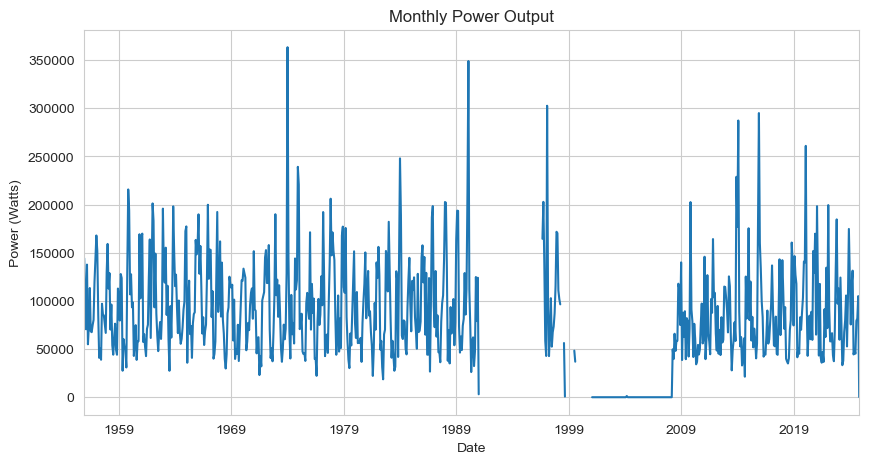

In [578]:
# Power output estimation
def power_output(wind_speed, air_density=1.225, rotor_area=100, efficiency=0.4):

    # Assuming rotor_area in m^2 and efficiency as a fraction
    return 0.5 * air_density * rotor_area * (wind_speed ** 3) * efficiency

df['Power Output'] = power_output(df['wdsp'])
daily_power_output = df['Power Output'].resample('ME').mean()
daily_power_output.plot(figsize=(10, 5), title="Monthly Power Output", ylabel="Power (Watts)", xlabel="Date")
plt.savefig('img/monthlypower_output')

### WindSpeed Statistics

Resample

`dataframe.resample()`: convenience method for frequency conversion and resampling of time series.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

#### Monthly Statistics

`DataFrame.transform`:  a tool that allows you to apply a function to each element of a DataFrame or Series, returning a result with the same shape as the original data.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html

In [579]:

df['monthly_meanwdsp'] = df['wdsp'].resample('ME').transform('mean') # monthly mean wind speed
df['monthly_minwdsp'] = df['wdsp'].resample('ME').transform('min') # monthly minimum wind speed
df['monthly_maxwdsp'] = df['wdsp'].resample('ME').transform('max') # monthly maximum wind speed

#### Yearly Statistics

In [580]:
df['yearly_meanwdsp'] = df['wdsp'].resample('YE').transform('mean') # yearly mean wind speed
df['yearly_minwdsp'] = df['wdsp'].resample('YE').transform('min') # yearly minimum wind speed
df['yearly_maxwdsp'] = df['wdsp'].resample('YE').transform('max') # yearly maximum wind speed

### Plots

#### Monthly Mean Windspeed

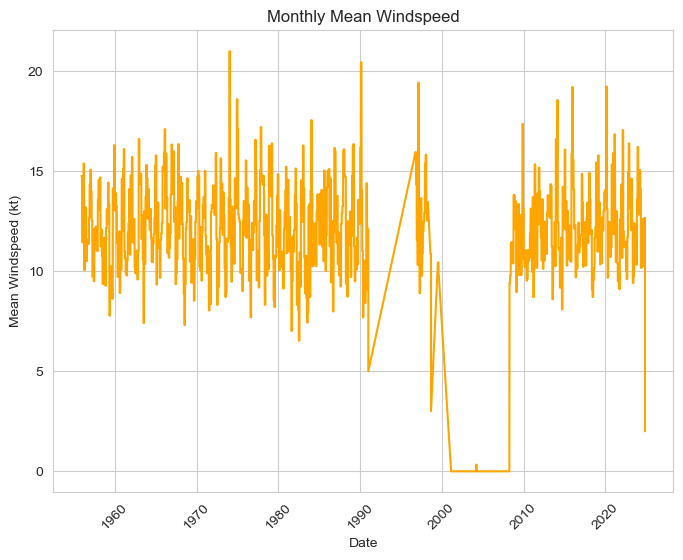

In [581]:
# Create a plot for monthly mean windspeed
plt.figure(figsize=(8, 6))
sns.lineplot(x='date', y='monthly_meanwdsp', data=df, color='orange')
plt.title('Monthly Mean Windspeed')
plt.xlabel('Date')
plt.ylabel('Mean Windspeed (kt)')

plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('img/monthly_meanwdsp')

#### Yearly Mean Windspeed

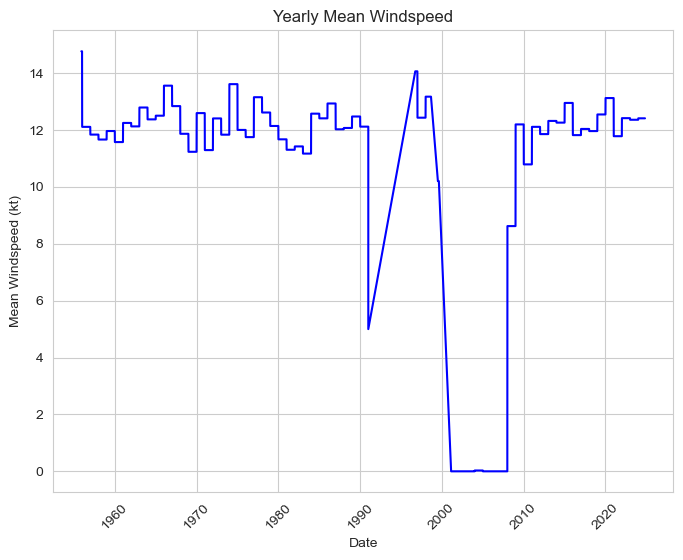

In [582]:
# Create a plot for yearly mean windspeed
plt.figure(figsize=(8, 6))
sns.lineplot(x='date', y='yearly_meanwdsp', data=df, color='blue')
plt.title('Yearly Mean Windspeed')
plt.xlabel('Date')
plt.ylabel('Mean Windspeed (kt)')

plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('img/yearly_meanwdsp')

#### Minimum and Maximum Windspeed

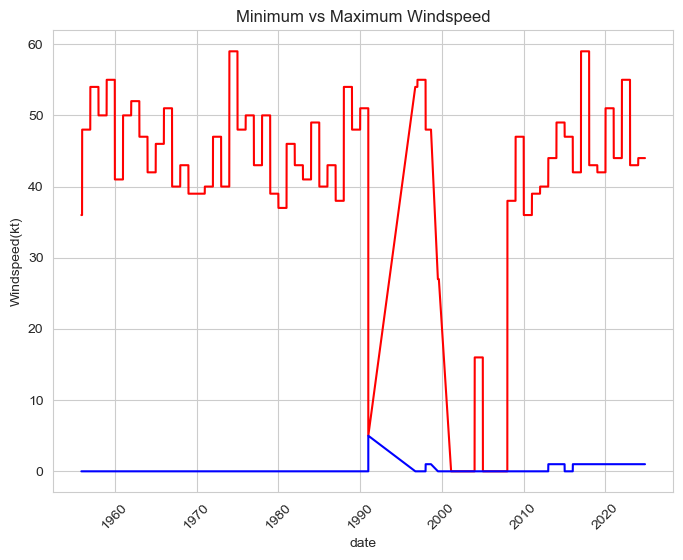

In [583]:
# Create a plot for minimum and maximum windspeed
plt.figure(figsize=(8, 6))
sns.lineplot(x='date', y='yearly_maxwdsp', data=df, color='red')
sns.lineplot(x='date', y='yearly_minwdsp', data=df, color='blue')
plt.title('Minimum vs Maximum Windspeed')

plt.xlabel('date')
plt.ylabel('Windspeed(kt)')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('img/min_maxwind')

### Temperature Statistics

#### Monthly Statistics

In [584]:
df['monthly_meantemp'] = df['temp'].resample('ME').transform('mean') # monthly mean temperature
df['monthly_mintemp'] = df['temp'].resample('ME').transform('min') # monthly minimum temperature
df['monthly_maxtemp'] = df['temp'].resample('ME').transform('max') # monthly maximum temperature

#### Yearly Statistics

In [585]:

df['yearly_meantemp'] = df['temp'].resample('YE').transform('mean') # yearly mean temperature
df['yearly_mintemp'] = df['temp'].resample('YE').transform('min') # yearly minimum wind speed
df['yearly_maxtemp'] = df['temp'].resample('YE').transform('max') # yearly maximum wind speed

### Plots

#### Monthly Mean Temperature

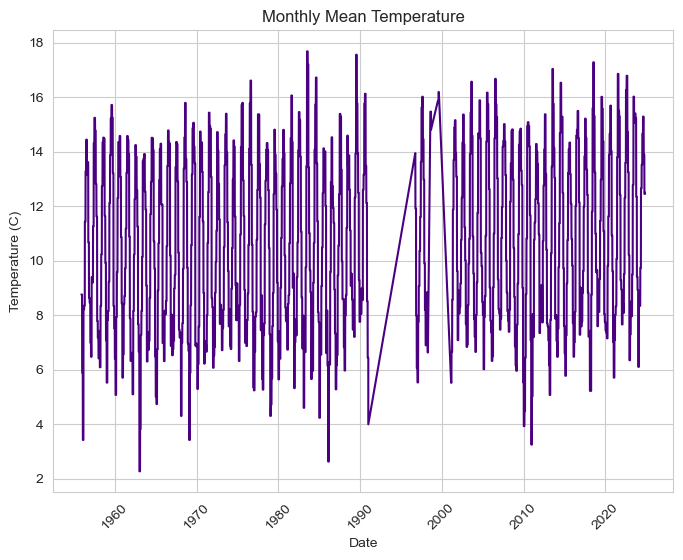

In [586]:
# Create a plot for monthly mean temperature
plt.figure(figsize=(8, 6))
sns.lineplot(x='date', y='monthly_meantemp', data=df, color='indigo')
plt.title('Monthly Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')

plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('img/monthly_meantemp')

#### Yearly Mean Temperature

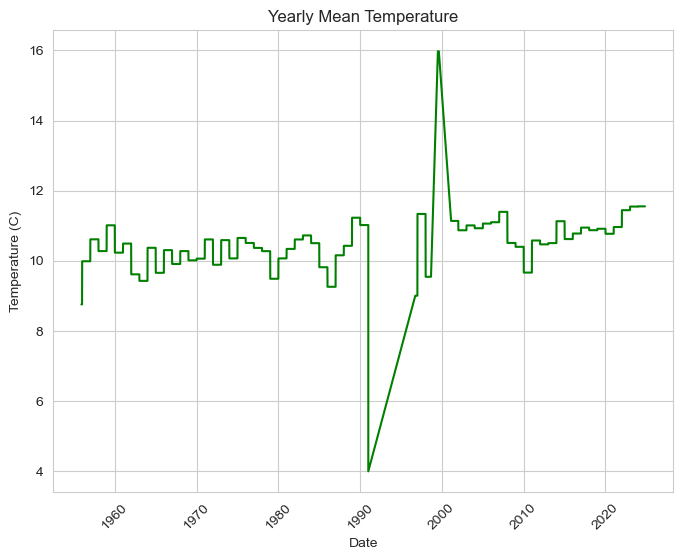

In [587]:
# Create a plot for yearly mean temperature
plt.figure(figsize=(8, 6))
sns.lineplot(x='date', y='yearly_meantemp', data=df, color='green')
plt.title('Yearly Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')

plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('img/yearly_meantemp')

#### Minimum vs Maximum Temperature

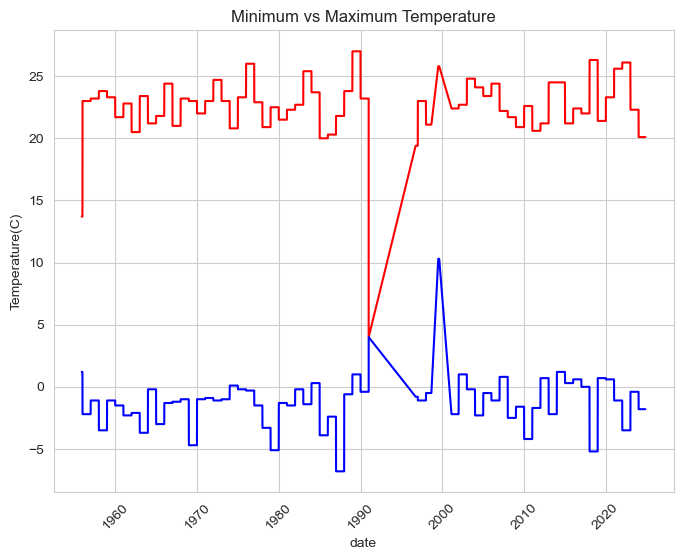

In [588]:
# Create a plot for yearly minimum and maximum temperature
plt.figure(figsize=(8, 6))
sns.lineplot(x='date', y='yearly_maxtemp', data=df, color='red')
sns.lineplot(x='date', y='yearly_mintemp', data=df, color='blue')
plt.title('Minimum vs Maximum Temperature')

plt.xlabel('date')
plt.ylabel('Temperature(C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('img/min_maxtemp')

### Temperature and Windspeed Correlation.



Correlation analysis shows the linear relationship between numerical features. These relationships help with feature selection and predictive modelling.

https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [589]:
# Calculate average temperature and windspeed daily.

df['meantemp'] = df['temp'].resample('D').transform('mean')
df['meanwdsp'] = df['wdsp'].resample('D').transform('mean')

`linearRegression`: a supervised machine learning algorithm used to predict the value of a dependent variable based on one or more independent variables

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#linearregression

#### Regression Plot

Regression plot add a visual guide that helps to visualize linear relationship between 2 parameters. 

https://seaborn.pydata.org/tutorial/regression.html

<Figure size 800x600 with 0 Axes>

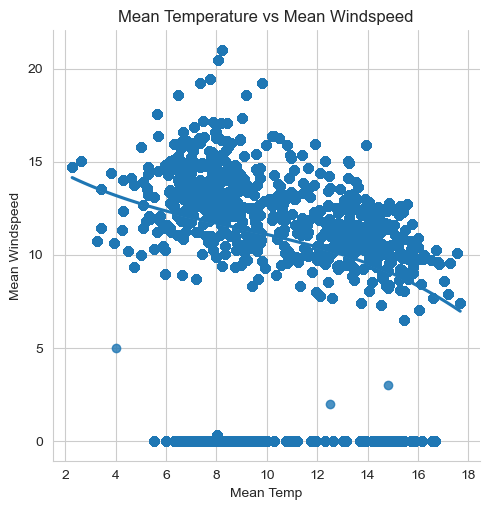

In [590]:
# Create a regression plot for mean temperature and mean windspeed.

plt.figure(figsize=(8, 6))
sns.set_style('whitegrid') 
sns.lmplot(x='monthly_meantemp', y='monthly_meanwdsp', data=df, order=3)

plt.title('Mean Temperature vs Mean Windspeed')
plt.xlabel('Mean Temp')
plt.ylabel('Mean Windspeed')
plt.savefig('img/meantemp_vs_meanwdsp')


#### Correlation Matrix

https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [591]:
Correlation_matrix = df[['temp', 'wdsp', 'rain', 'rhum']].corr()
Correlation_matrix

,temp,wdsp,rain,rhum
temp,1.000000,-0.030964,-0.003590,-0.028422
wdsp,-0.030964,1.000000,0.188604,-0.100076
rain,-0.003590,0.188604,1.000000,0.190406
rhum,-0.028422,-0.100076,0.190406,1.000000


Overall, the correlations are very weak, with all values close to 0. This suggests that there are no strong linear relationships between these variables in the dataset.

**Weakest Relationships:**

* temp vs. other variables have near-zero correlations, meaning temperature has almost no measurable linear relationship with wind speed, rainfall, or humidity in this dataset.

**Slightly Stronger Correlations:**

* rain vs. rhum (0.190) and wdsp vs. rain (0.189) show some weak positive relationships. This could indicate that rainfall events are modestly tied to higher humidity and wind speeds.

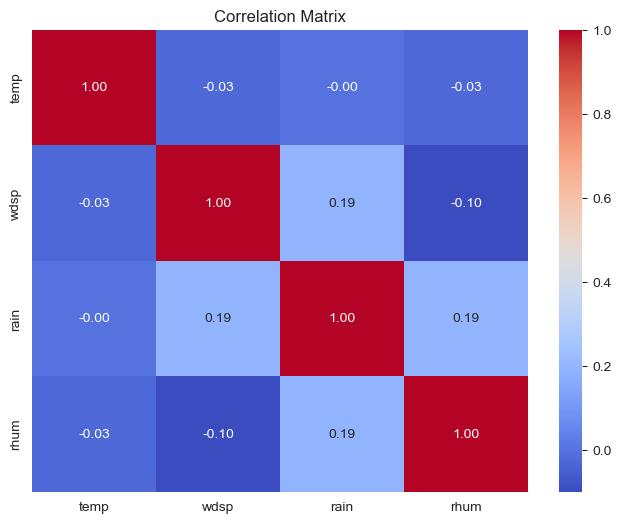

In [592]:
# Create the correlation matrix heatmap
plt.figure(figsize=(8, 6))

sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('img/correlation_matrix')

### Predictions

In [593]:
# calculate the monthly mean
df_monthly = df['wdsp'].resample('ME').mean()

In [594]:
# Add time-based features
df = df.reset_index
df_monthly = df_monthly.reset_index()
df_monthly['Year'] = df_monthly['date'].dt.year
df_monthly['Month'] = df_monthly['date'].dt.month
df_monthly['Day'] = df_monthly['date'].dt.day

In [595]:
# Feature and target
X = df_monthly[['Year', 'Month', 'Day']]
y = df_monthly['wdsp']


In [596]:
# Fill the missing values
y.ffill(inplace = True)

 `train_test_split`: function that splits your dataset into a training set and a testing set. The training set is used to train your machine learning model, while the testing set evaluates its performance.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [597]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

`RandomForestRegressor`: algorithms that use the combination of multiple random decision trees each trained on a subset of data. 

https://scikit-learn.org/1.4/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [601]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [599]:
# Evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

Root Mean Squared Error: 2.848872764258276
R² Score: -0.6020079318831077


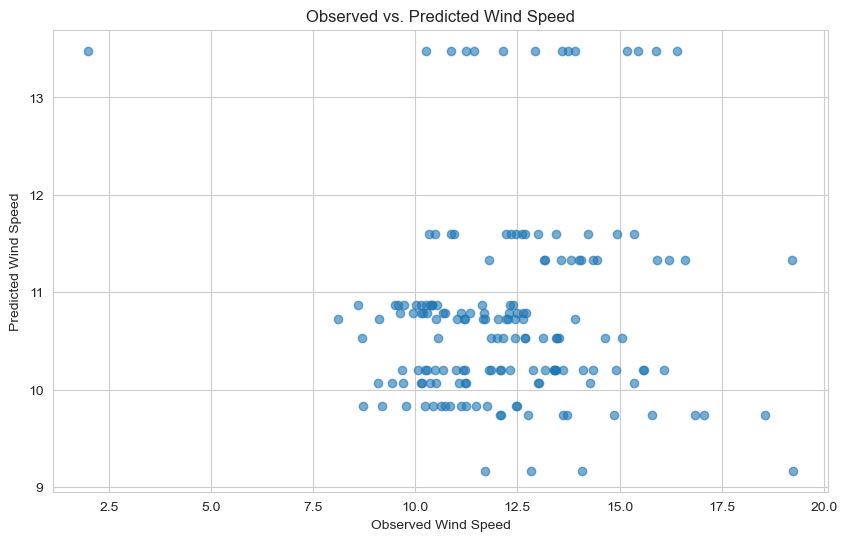

In [600]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Observed Wind Speed")
plt.ylabel("Predicted Wind Speed")
plt.title("Observed vs. Predicted Wind Speed")
plt.savefig('img/obs_predspeed')

# End